In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

In [7]:
poweroveromega3EP = np.load("../data/poweroveromega3EP.npz")
poweroveromega3EPss = np.load("../data/poweroveromega3EPss.npz")
totalfield3EP = np.load("../data/totalfield3EP.npz")
searchmap3EP = np.load("../data/searchmap3EP.npz")

### 3 scatterers - total field

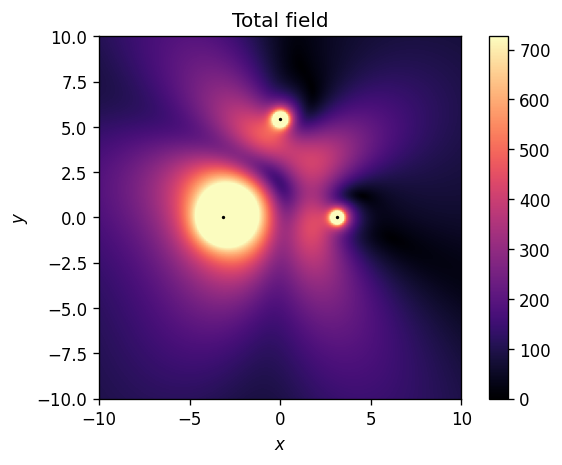

In [3]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

giff = np.load("../gif/gif1.npz")

scattpos = giff["scattpos"]
xx = giff["xx"]
yy = giff["yy"]
phitot = giff["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total field")

plt.show()

### 3 scatterers - output power over omega - EP

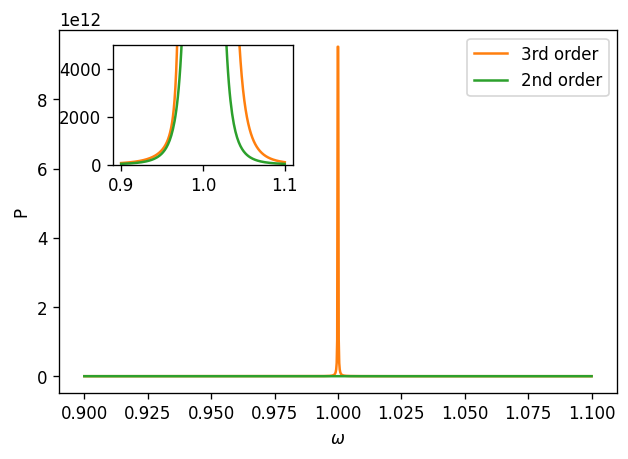

In [ ]:
# here, the eigenvalues go to zero AND the eigenvectors coalesce

fig, ax = plt.subplots(dpi=120)

ax.plot(poweroveromega3EPss["omega"], poweroveromega3EPss["P"], label='3rd order', color="C1")
ax.plot(poweroveromega["omega"], poweroveromega["P"], label="2nd order", color="C2")
ax.set_xlabel("$\\omega$")
ax.set_ylabel("P")
ax.legend()

ax_in = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax_in.plot(poweroveromega3EP["omega"], poweroveromega3EP["P"], color="C1")
ax_in.plot(poweroveromega["omega"], poweroveromega["P"], color="C2")
ax_in.set_ylim(0, 5000);

### 3 scatterers - search peak map

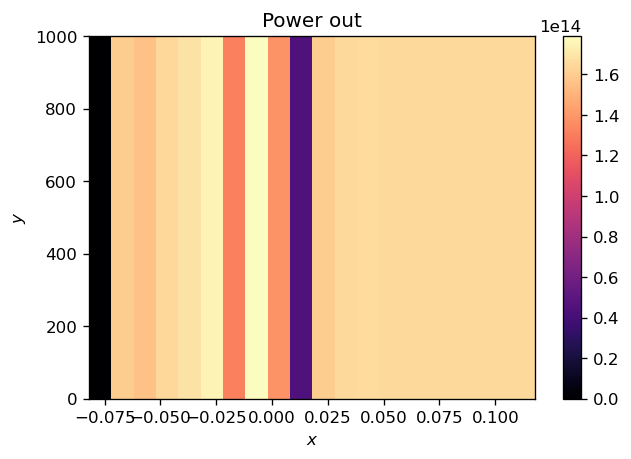

In [ ]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

xx = searchmap3EP["xx"]
yy = searchmap3EP["yy"]
mapp = searchmap3EP["map"]

plt.imshow(mapp,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           aspect='auto')

plt.colorbar()
plt.clim(0, np.max(mapp))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Power out")

plt.show()

### 3 scatterers - total field over $\omega$ (animation)

In [ ]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

omegaspan = np.load("../gif/gif1.npz")["omegaspan"]
phiinput = np.load("../gif/gif1.npz")["phiinput"]
scattpos = np.load("../gif/gif1.npz")["scattpos"]
xx = np.load("../gif/gif1.npz")["xx"]
yy = np.load("../gif/gif1.npz")["yy"]
phitot = np.load("../gif/gif1.npz")["phitot"]

ngiff = 200
giff = np.zeros((ngiff, np.size(xx), np.size(yy)))
for i in range(ngiff):
    giff[i] = abs(np.load("../gif/gif"+str(i+1)+".npz")["phitot"])
plt.scatter(scattpos[:, 0], scattpos[:, 1], c='k', s=1)
y_init = plt.imshow(giff[0], origin="lower",
                          extent=(xx[0], xx[-1], yy[0], yy[-1]),
                          cmap="magma", aspect=1)
time_init = plt.text(0.05, 0.1, "t = 0", c='w', transform = ax.transAxes)
omegaspan_init = plt.text(0.05, 0.04, "$\omega$ = "+str(omegaspan[0]), c='w', transform = ax.transAxes)
plt.clim(0, np.max(giff[int(ngiff/2)])/2000)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total field")

n_frames = ngiff
def animate(i):
    i_time = int(i/n_frames*100)
    y_init.set_data(giff[i])
    time_init.set_text("t = {0:d}".format(i_time))
    omegaspan_init.set_text("$\omega$ = {0:.3f}".format(omegaspan[i]))
    return y_init, time_init, omegaspan_init

_animation = animation.FuncAnimation(fig, animate, frames=n_frames, interval=50, blit=False)
plt.tight_layout()
plt.show()

writer = animation.PillowWriter(fps=30)
_animation.save("animation_omega.gif", writer=writer)

### 3 scatterers - total field over r (animation)

In [ ]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

rspan = np.load("../gif/gif1.npz")["rspan"]
phiinput = np.load("../gif/gif1.npz")["phiinput"]
scattpos = np.load("../gif/gif1.npz")["scattpos"]
xx = np.load("../gif/gif1.npz")["xx"]
yy = np.load("../gif/gif1.npz")["yy"]
phitot = np.load("../gif/gif1.npz")["phitot"]

ngiff = 200
giff = np.zeros((ngiff, np.size(xx), np.size(yy)))
for i in range(ngiff):
    giff[i] = abs(np.load("../gif/gif"+str(i+1)+".npz")["phitot"])
plt.scatter(scattpos[:, 0], scattpos[:, 1], c='k', s=1)
y_init = plt.imshow(giff[0], origin="lower",
                          extent=(xx[0], xx[-1], yy[0], yy[-1]),
                          cmap="magma", aspect=1)
time_init = plt.text(0.05, 0.1, "t = 0", c='w', transform = ax.transAxes)
rspan_init = plt.text(0.05, 0.04, "$r$ = "+str(rspan[0]), c='w', transform = ax.transAxes)
plt.clim(0, np.max(giff[int(ngiff/2)])/2000)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total field")

n_frames = ngiff
def animate(i):
    i_time = int(i/n_frames*100)
    y_init.set_data(giff[i])
    time_init.set_text("t = {0:d}".format(i_time))
    rspan_init.set_text("$r$ = {0:.3f}".format(rspan[i]))
    return y_init, time_init, rspan_init

_animation = animation.FuncAnimation(fig, animate, frames=n_frames, interval=50, blit=False)
plt.tight_layout()
plt.show()

writer = animation.PillowWriter(fps=30)
_animation.save("animation_r.gif", writer=writer)

### 3 scatterers - eigenvalues coalescence (animation)

In [ ]:
plt.close('all')
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

scattpos = np.load("../data/eigcoalescence_3scatt.npz")["scattpos"]
rspan = np.load("../data/eigcoalescence_3scatt.npz")["rspan"]
eigs = np.load("../data/eigcoalescence_3scatt.npz")["eigs"]

plt.axhline(0, ls='dotted', c='grey', lw=1)
plt.axvline(0, ls='dotted', c='grey', lw=1)
plt.xlim(-np.max(np.abs(eigs.real))*3/2, np.max(np.abs(eigs.real))*3/2)
plt.ylim(-np.max(np.abs(eigs.imag))*3/2, np.max(np.abs(eigs.imag))*3/2)

# plot eigs guidelines
xx = np.linspace(-1, 1, 2)
y1 = lambda x : eigs[0].imag[0]/eigs[0].real[0]*x
y2 = lambda x : eigs[0].imag[1]/eigs[0].real[1]*x
y3 = lambda x : eigs[0].imag[2]/eigs[0].real[2]*x
plt.plot(xx, y1(xx), ls='dashed', c='r', lw=1, alpha=0.3)
plt.plot(xx, y2(xx), ls='dashed', c='r', lw=1, alpha=0.3)
plt.plot(xx, y3(xx), ls='dashed', c='r', lw=1, alpha=0.3)

# main plot
y_init, = plt.plot(eigs[0].real, eigs[0].imag, 'x', c='r')
time_init = plt.text(0.05, 0.1, "t = 0", c='k', transform = ax.transAxes)
rspan_init = plt.text(0.05, 0.04, "$r$ = {0:.3f}".format(rspan[0]), c='k', transform = ax.transAxes)
plt.xlabel("Real")
plt.ylabel("Imag")
plt.title("Eigenvalues")

# inset
ax_in = fig.add_axes([0.71, 0.7, 0.2, 0.2])
yin_init, = ax_in.plot(scattpos[0, :, 0], scattpos[0, :, 1], '.', c='k')
ax_in.axhline(scattpos[int(ngiff/2), 1, 1]+(scattpos[int(ngiff/2), 1, 1]-scattpos[0, 1, 1])*80, ls='dashed', c='b', lw=1, alpha=0.5)
ax_in.set_xlim(-5,5)
ax_in.set_ylim(-2,10)
ax_in.set_xlabel("x")
ax_in.set_ylabel("y")

n_frames = np.shape(eigs)[0]
def animate(i):
    i_time = int(i/n_frames*100)
    y_init.set_data(eigs[i].real, eigs[i].imag)
    yin_init.set_data(scattpos[i, :, 0], scattpos[i, :, 1]+(scattpos[i, :, 1]-scattpos[0, :, 1])*80)
    time_init.set_text("t = {0:d}".format(i_time))
    rspan_init.set_text("$r$ = {0:.3f}".format(rspan[i]))
    return y_init, yin_init, time_init, rspan_init

_animation = animation.FuncAnimation(fig, animate, frames=n_frames, interval=50, blit=True)
plt.tight_layout()
plt.show()

writer = animation.PillowWriter(fps=30)
_animation.save("animation_eigs_nlsolve.gif", writer=writer)